# 调用高德Web服务

In [1]:
import pandas as pd
import requests
key ="b1f214187c9ead6a9f9d98cae10bd20b"

## 获取地理编码

In [12]:
# A-1 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
七高 = geocode(address='广东省深圳市宝安区第七高级中学')
print(七高)
df_七高地理编码 = pd.json_normalize(七高['geocodes'])
display(df_七高地理编码)
七高地理编码 = 七高['geocodes'][0]['location']
print("七高地理编码:",七高地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省深圳市宝安区第七高级中学', 'country': '中国', 'province': '广东省', 'citycode': '0755', 'city': '深圳市', 'district': '宝安区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440306', 'street': [], 'number': [], 'location': '113.784257,22.732581', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省深圳市宝安区第七高级中学,中国,广东省,0755,深圳市,宝安区,[],440306,[],[],"113.784257,22.732581",兴趣点,[],[],[],[]


七高地理编码: 113.784257,22.732581


In [13]:
# A-2 基础逆地理编码分析
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

七高逆地理编码_base = regeocode(七高地理编码)
print(七高逆地理编码_base)
df_七高逆地理编码 = pd.json_normalize(七高逆地理编码_base).T
display(df_七高逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '深圳市', 'province': '广东省', 'adcode': '440306', 'district': '宝安区', 'towncode': '440306005000', 'streetNumber': {'number': '70号', 'location': '113.784367,22.7332656', 'direction': '北', 'distance': '76.9418', 'street': '民主大道'}, 'country': '中国', 'township': '沙井街道', 'businessAreas': [{'location': '113.821084,22.730221', 'name': '沙井', 'id': '440306'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0755'}, 'formatted_address': '广东省深圳市宝安区沙井街道深圳市第七高级中学'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,深圳市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440306
regeocode.addressComponent.district,宝安区
regeocode.addressComponent.towncode,440306005000
regeocode.addressComponent.streetNumber.number,70号
regeocode.addressComponent.streetNumber.location,"113.784367,22.7332656"


In [14]:
七高逆地理编码_all = regeocode(七高地理编码,extensions="all")
print(七高逆地理编码_all)
df_七高逆地理编码_all = pd.json_normalize(七高逆地理编码_all)
display(df_七高逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0755F49F016047733', 'location': '113.786,22.7329', 'direction': '西', 'name': '锦程路', 'distance': '152.878'}, {'id': '0755F49F01604756', 'location': '113.784,22.7344', 'direction': '南', 'name': '民主大道', 'distance': '202.697'}, {'id': '0755F49F01604761', 'location': '113.786,22.7309', 'direction': '西北', 'name': '新沙路', 'distance': '232.376'}], 'roadinters': [{'second_name': '锦程路', 'first_id': '0755F49F01604761', 'second_id': '0755F49F016047733', 'location': '113.7856936,22.73078417', 'distance': '248.273', 'first_name': '新沙路', 'direction': '西北'}], 'formatted_address': '广东省深圳市宝安区沙井街道深圳市第七高级中学', 'addressComponent': {'city': '深圳市', 'province': '广东省', 'adcode': '440306', 'district': '宝安区', 'towncode': '440306005000', 'streetNumber': {'number': '70号', 'location': '113.784367,22.7332656', 'direction': '北', 'distance': '76.9418', 'street': '民主大道'}, 'country': '中国', 'township': '沙井街道', 'businessAreas': [{'location': '113.821084,22.730221', 'name': '沙井

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0755F49F016047733', 'location': '113....","[{'second_name': '锦程路', 'first_id': '0755F49F0...",广东省深圳市宝安区沙井街道深圳市第七高级中学,深圳市,广东省,440306,宝安区,...,中国,沙井街道,"[{'location': '113.821084,22.730221', 'name': ...",[],[],[],[],0755,"[{'area': '78772.546606', 'type': '141202', 'i...","[{'id': 'B0FFG6H272', 'direction': '西南', 'busi..."


### 思考
* 地理编码将详细地址转换为纬度坐标。且支持对地标景点名称名解析为高德经纬度坐标。逆地理编码：将经纬度转换为详细地址，且返回附近周边的POI、AOI信息，在位置描述上,具有更高的灵活度。我认为在调用该功能的时候它是具备ML、AI的功能的。

## 路径规划（步行）

In [19]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
深附 = geocode('广东省深圳市深圳大学附属中学')
深附_location = 深附['geocodes'][0]['location']
七高_location = 七高['geocodes'][0]['location']
print("(起点)七高_location:",七高_location,"(终点)深附_location:",深附_location)

(起点)七高_location: 113.784257,22.732581 (终点)深附_location: 113.897125,22.504315


In [21]:
七高_深附 = walking(七高_location,深附_location)
df_步行路径规划 = pd.json_normalize(七高_深附["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向南步行186米右转,南,[],186,149,"113.784371,22.732574;113.784258,22.730903",右转,[],0
1,向西步行12米左转,西,[],12,10,"113.784253,22.730898;113.784145,22.730885",左转,[],0
2,向南步行13米左转,南,[],13,10,"113.784141,22.730881;113.784141,22.73082;113.7...",左转,[],0
3,向东步行147米右转,东,[],147,118,"113.784141,22.73076;113.78497,22.730907;113.78...",右转,[],0
4,沿锦程路向南步行565米向右前方行走,南,锦程路,565,452,"113.785551,22.730851;113.785356,22.728681;113....",向右前方行走,[],0
...,...,...,...,...,...,...,...,...,...
117,沿前海路步行63米右转,[],前海路,63,50,"113.898741,22.504653;113.898715,22.50454;113.8...",右转,[],0
118,向西北步行45米左转,西北,[],45,36,"113.898451,22.504145;113.898364,22.504249;113....",左转,[],0
119,向西步行26米右转,西,[],26,21,"113.898281,22.504514;113.898134,22.504497;113....",右转,[],0
120,向西北步行81米左转,西北,[],81,65,"113.898016,22.504475;113.897999,22.504601;113....",左转,[],0


0              向南步行186米右转
1               向西步行12米左转
2               向南步行13米左转
3              向东步行147米右转
4      沿锦程路向南步行565米向右前方行走
              ...        
117           沿前海路步行63米右转
118            向西北步行45米左转
119             向西步行26米右转
120            向西北步行81米左转
121         向西南步行73米到达目的地
Name: instruction, Length: 122, dtype: object

### 思考
* 路径规划包含了广度优先算法、启发式搜索等推荐算法，可以在给定的数据中进行学习，给用户提供选择，我认为路径规划具有ML、AI的功能。

## 行政区域查询

In [30]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='湖北',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_武汉市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
display(df_行政区域_1级,df_行政区域_2级_武汉市)

,citycode,adcode,name,center,level,districts
0,027,420100,武汉市,"114.298572,30.584355",city,"[{'citycode': '027', 'adcode': '420117', 'name..."
1,0712,420900,孝感市,"113.926655,30.926423",city,"[{'citycode': '0712', 'adcode': '420982', 'nam..."
2,0713,421100,黄冈市,"114.879365,30.447711",city,"[{'citycode': '0713', 'adcode': '421181', 'nam..."
3,0724,420800,荆门市,"112.204251,31.03542",city,"[{'citycode': '0724', 'adcode': '420882', 'nam..."
4,0719,420300,十堰市,"110.787916,32.646907",city,"[{'citycode': '0719', 'adcode': '420304', 'nam..."
5,0717,420500,宜昌市,"111.290843,30.702636",city,"[{'citycode': '0717', 'adcode': '420525', 'nam..."
6,1728,429006,天门市,"113.165862,30.653061",city,"[{'citycode': '1728', 'adcode': '429006', 'nam..."
7,0710,420600,襄阳市,"112.144146,32.042426",city,"[{'citycode': '0710', 'adcode': '420682', 'nam..."
8,0728,429004,仙桃市,"113.453974,30.364953",city,"[{'citycode': '0728', 'adcode': '429004', 'nam..."
9,2728,429005,潜江市,"112.896866,30.421215",city,"[{'citycode': '2728', 'adcode': '429005', 'nam..."


,citycode,adcode,name,center,level,districts
0,0716,421003,荆州区,"112.195354,30.350674",district,"[{'citycode': '0716', 'adcode': '421003', 'nam..."
1,0716,421083,洪湖市,"113.470304,29.81297",district,"[{'citycode': '0716', 'adcode': '421083', 'nam..."
2,0716,421024,江陵县,"112.41735,30.033919",district,"[{'citycode': '0716', 'adcode': '421024', 'nam..."
3,0716,421023,监利县,"112.904344,29.820079",district,"[{'citycode': '0716', 'adcode': '421023', 'nam..."
4,0716,421087,松滋市,"111.77818,30.176037",district,"[{'citycode': '0716', 'adcode': '421087', 'nam..."
5,0716,421002,沙市区,"112.257433,30.315895",district,"[{'citycode': '0716', 'adcode': '421002', 'nam..."
6,0716,421081,石首市,"112.40887,29.716437",district,"[{'citycode': '0716', 'adcode': '421081', 'nam..."
7,0716,421022,公安县,"112.230179,30.059065",district,"[{'citycode': '0716', 'adcode': '421022', 'nam..."


### 思考
* 行政区域查询通过下载相应的文档进行查找；和通过插件DistrictSearch进行搜索查询。这两种方法无需使用推荐算法调用，仅是调用后台数据内容，所以我认为行政区域查询是不具备ML、AI的功能的。

## 搜索POI

In [27]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

深圳_大学 = place_text('大学','高等院校',city="深圳市",children=1,extensions='all')
深圳_大学

{'status': '1',
 'count': '49',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFI9P7G8',
   'parent': [],
   'childtype': [],
   'name': '深圳职业技术学院(东区)',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '西丽街道新围社区沙河西路4089号',
   'location': '113.947812,22.591970',
   'tel': '0755-26731352',
   'postcode': '518055',
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0755',
   'cityname': '深圳市',
   'adcode': '440305',
   'adname': '南山区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3313771502',
   'distance': [],
   'navi_poiid': 'F49F017048_65376',
   'entr_location': '113.9544,22.587789',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-04-07 15:24:09',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], '

In [28]:
df_深圳_大学 = pd.json_normalize(深圳_大学["pois"])
df_深圳_大学_深圳大学 = pd.json_normalize(深圳_大学["pois"][7]["children"])
display(df_深圳_大学,df_深圳_大学_深圳大学)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B0FFI9P7G8,[],[],深圳职业技术学院(东区),[],科教文化服务;学校;高等院校,141201,[],西丽街道新围社区沙河西路4089号,"113.947812,22.591970",...,0,[],"[{'id': ' B02F37VJPR ', 'name': ' 深圳职业技术学院东区(西...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,[]
1,B02F37UIGT,B0FFK135CJ,309,深圳大学粤海校区,[],科教文化服务;学校;高等院校,141201,[],南海大道3688号,"113.936683,22.532681",...,0,[],"[{'id': ' B0FFF3XB7T ', 'name': ' 深圳大学粤海校区(立德门...","[{'title': '外景图', 'url': 'http://store.is.auto...",[],[],[],[],[],[]
2,B02F38J6V9,[],[],南方科技大学,[],科教文化服务;学校;高等院校,141201,[],西丽大学城学苑大道1088号(塘朗站),"113.999887,22.598886",...,0,[],"[{'id': ' B02F38JFR0 ', 'name': ' 南方科技大学(正门) '...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
3,B02F38JF39,[],[],深圳信息职业技术学院,[],科教文化服务;学校;高等院校,141201,[],龙翔大道2188号(近体育新城),"114.215574,22.684209",...,0,[],"[{'id': ' B02F38JELR ', 'name': ' 深圳信息职业技术学院(西...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
4,B02F37VHEM,[],[],深圳职业技术学院西丽湖校区,[],科教文化服务;学校;高等院校,141201,[],沙河西路4089号,"113.95113,22.588337",...,0,[],"[{'id': ' B02F37VQPY ', 'name': ' 深圳职业技术学院西丽湖校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
5,B02F37UGFZ,[],[],深圳职业技术学院华侨城校区,[],科教文化服务;学校;高等院校,141201,[],香蜜湖街道香岭社区职教街3号,"113.999681,22.536615",...,0,[],"[{'id': ' B02F37VY4L ', 'name': ' 深圳职业技术学院华侨城校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
6,B0FFHHKZQA,[],[],深圳北理莫斯科大学,[],科教文化服务;学校;高等院校,141201,[],龙岗公众高尔夫球场内,"114.20532,22.679921",...,0,[],[],"[{'title': [], 'url': 'http://aos-cdn-image.am...",[],[],[],[],[],[]
7,B0FFFTROX1,B0FFLIWQP5,309,深圳大学丽湖校区,[],科教文化服务;学校;高等院校,141201,[],桃源街道学苑大道1066号,"113.992764,22.596789",...,0,[],"[{'id': ' B0FFHQR3V1 ', 'name': ' 深圳大学丽湖校区(惟品门...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
8,B0FFF4H4MQ,[],[],香港中文大学(深圳),[],科教文化服务;学校;高等院校,141201,[],龙翔大道2001号,"114.212776,22.688259",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
9,B02F309V6W,[],[],深圳广播电视大学龙岗分校,[],科教文化服务;学校;高等院校,141201,[],黄阁路160号,"114.219469,22.717279",...,0,[],"[{'id': ' B02F37VHA3 ', 'name': ' 深圳广播电视大学龙岗分校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]


,id,name,sname,location,address,distance,subtype,typecode
0,B0FFHQR3V1,深圳大学丽湖校区(惟品门),惟品门,"113.989231,22.597147",国家超级计算深圳中心旁边,0,门,991400
1,B0FFI4WZXJ,深圳大学丽湖校区(惟艺门),惟艺门,"113.995082,22.596052",,0,门,991400


### 思考
* 搜索POL包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制，所以它必须包含搜索算法。同时对大型的数据集进行模式识别，所以我认为它背后是含有ML、AI的功能的。

## IP定位

In [31]:

def ip(ip:str):
    params= {
        'key':key,
        'ip':ip,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/ip?parameters", params)
    data = response.json()
    del data['status']
    del data['info']
    df = ["省份: %s"%(data['province']),"地区: %s"%(data['city']),"地理编码: %s"%(data['adcode']),"经纬度: %s"%(data['rectangle']),]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

ip("116.76.254.162")

ip:116.76.254.162
省份: 广东省
地区: 深圳市
地理编码: 440300
经纬度: 113.9629412,22.4627142;114.2106056,22.61394155


### 思考
* ip定位功能是根据用户输入的IP地址，能够快速的帮用户定位IP的所在位置，IP地址API提供给用户单向的ip搜索功能，所以我认为它不具备ML、AI的功能。

## 静态地图

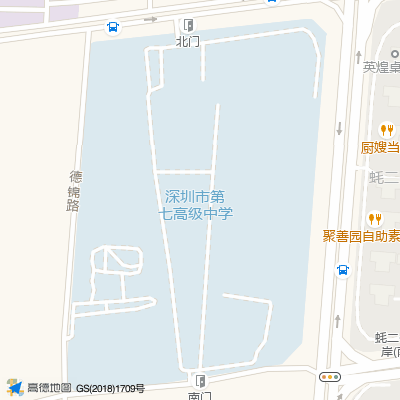

In [32]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
staticmap(location=七高_location,zoom=16)

### 思考
* 静态地图中有涉及计算机视觉的功能，用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，所以我认为它具备ML、AI的功能

## 坐标转换

In [33]:
def assistant(locations:str,coordsys:str):
    params = {
        'key':key,
        'coordsys':coordsys,
        'locations': locations,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params)
    data = response.json()['locations']
    return data
assistant("113.9629412,22.4627142;114.2106056,22.61394155",'gps')

'113.967843695747,22.459739854601;114.215487738716,22.611111924914'

### 思考
* 坐标转换功能能调用其他的坐标通过算法计算对比不同平台坐标并转化，所以我认为其背后含有ML、AI的功能。

## 天气查询

In [34]:
def weather(city:str):
    params = {
        'key':key,
        'city':city,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/weather/weatherInfo?parameters", params)
    data = response.json()
    return data
weather('深圳')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '深圳市',
   'adcode': '440300',
   'weather': '多云',
   'temperature': '25',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '82',
   'reporttime': '2020-04-21 20:52:35'}]}

### 思考
* 天气查询功能只需要调用查询地天气数据，所以我认为有ML、AI的功能

## 输入提示

In [36]:
def inputtips(keywords:str):
    params = {
        'key':key,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/inputtips?parameters", params)
    data = response.json()
    return data
inputtips('深圳')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B02F30A89U',
   'name': '深圳站',
   'district': '广东省深圳市罗湖区',
   'adcode': '440303',
   'location': '114.117751,22.531948',
   'address': '建设路1号',
   'typecode': '150200',
   'city': []},
  {'id': [],
   'name': '深圳市',
   'district': '广东省深圳市',
   'adcode': '440304',
   'location': [],
   'address': '福田区',
   'typecode': '190104',
   'city': []},
  {'id': 'B02F38IPWZ',
   'name': '深圳北站',
   'district': '广东省深圳市龙华区',
   'adcode': '440309',
   'location': '114.0295,22.609875',
   'address': '致远中路28号',
   'typecode': '150200',
   'city': []},
  {'id': 'B02F302519',
   'name': '深圳西站',
   'district': '广东省深圳市南山区',
   'adcode': '440305',
   'location': '113.907276,22.527291',
   'address': '学府路与月亮湾大道交汇处',
   'typecode': '150200',
   'city': []},
  {'id': 'B031D0QANU',
   'name': '深圳',
   'district': '江西省赣州市寻乌县',
   'adcode': '360734',
   'location': '115.539713,24.735923',
   'address': [],
   'typecode': '19010

### 思考
* 该功能提供根据用户输入的关键词查询返回，我不认为有ML、AI的功能

## 交通态势

In [38]:
def rectangle(rectangle:str):
    params = {
        'key':key,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/traffic/status/rectangle?parameters", params)
    data = response.json()
    return data
rectangle('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

### 思考
* 交通态势功能是提供根据用户输入的内容能够返回希望查询的交通态势情况，所以我认为其背后含有ML、AI的功能

## 设计一个简单的应用

* 应用：一款可以推送沿途景点地标、交通状况的旅行APP

* 具备的功能：
  * 地理编码、搜索PIO：可以推送附近的旅游地标景点 
  * ip定位、静态地图：可以定位用户位置，提供位置地图 
  * 交通态势：可以查询当前位置的交通情况 